# **House Price Prediction and Analysis**

In [71]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from numpy.linalg import inv
#%matplotlib inline

## **Anteproyecto - Aplicación en analítica de datos**

**Base de datos utilizada:** [House Prices dataset](https://www.kaggle.com/datasets/lespin/house-prices-dataset)

#### **Obtener los datos**

In [12]:
import pandas as pd
import numpy as np

#Buscar la base de datos en el Drive como xlsx
ruta = "/content/data.xlsx"
base = pd.read_excel(ruta)

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [13]:
#Mirar la base de datos subida
base

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


#### **Análisis exploratorio básico**

In [14]:
#revisar cantidad de datos, tipos de datos, campos vacios
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [15]:
#Conteo de los valores en una característica
base["SalePrice"].value_counts()

,count
SalePrice,
140000,20
135000,17
155000,14
145000,14
190000,13
...,...
202665,1
164900,1
208300,1


,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


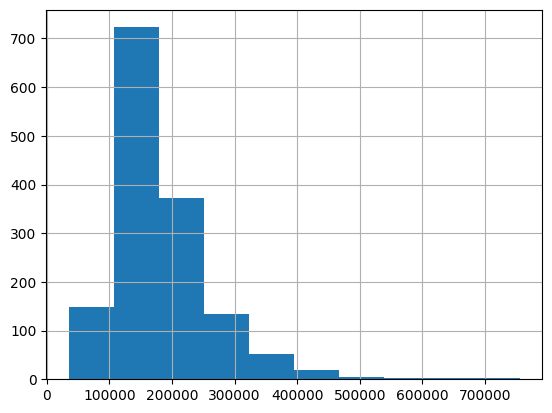

In [16]:
base["SalePrice"].hist() #Número de veces que se repiten los datos en intervalos según la variable(precio)
base["SalePrice"].describe() #Estadística básica de las variables

*Según el histograma hecho para la variable a predecir que es 'SalePrice' o el precio de las casas, la mayoría de valores estan entre 100000 y 200000 mil dolares con un poco mas de 700 casas, tiene parecida la forma a una distribución gamma.*

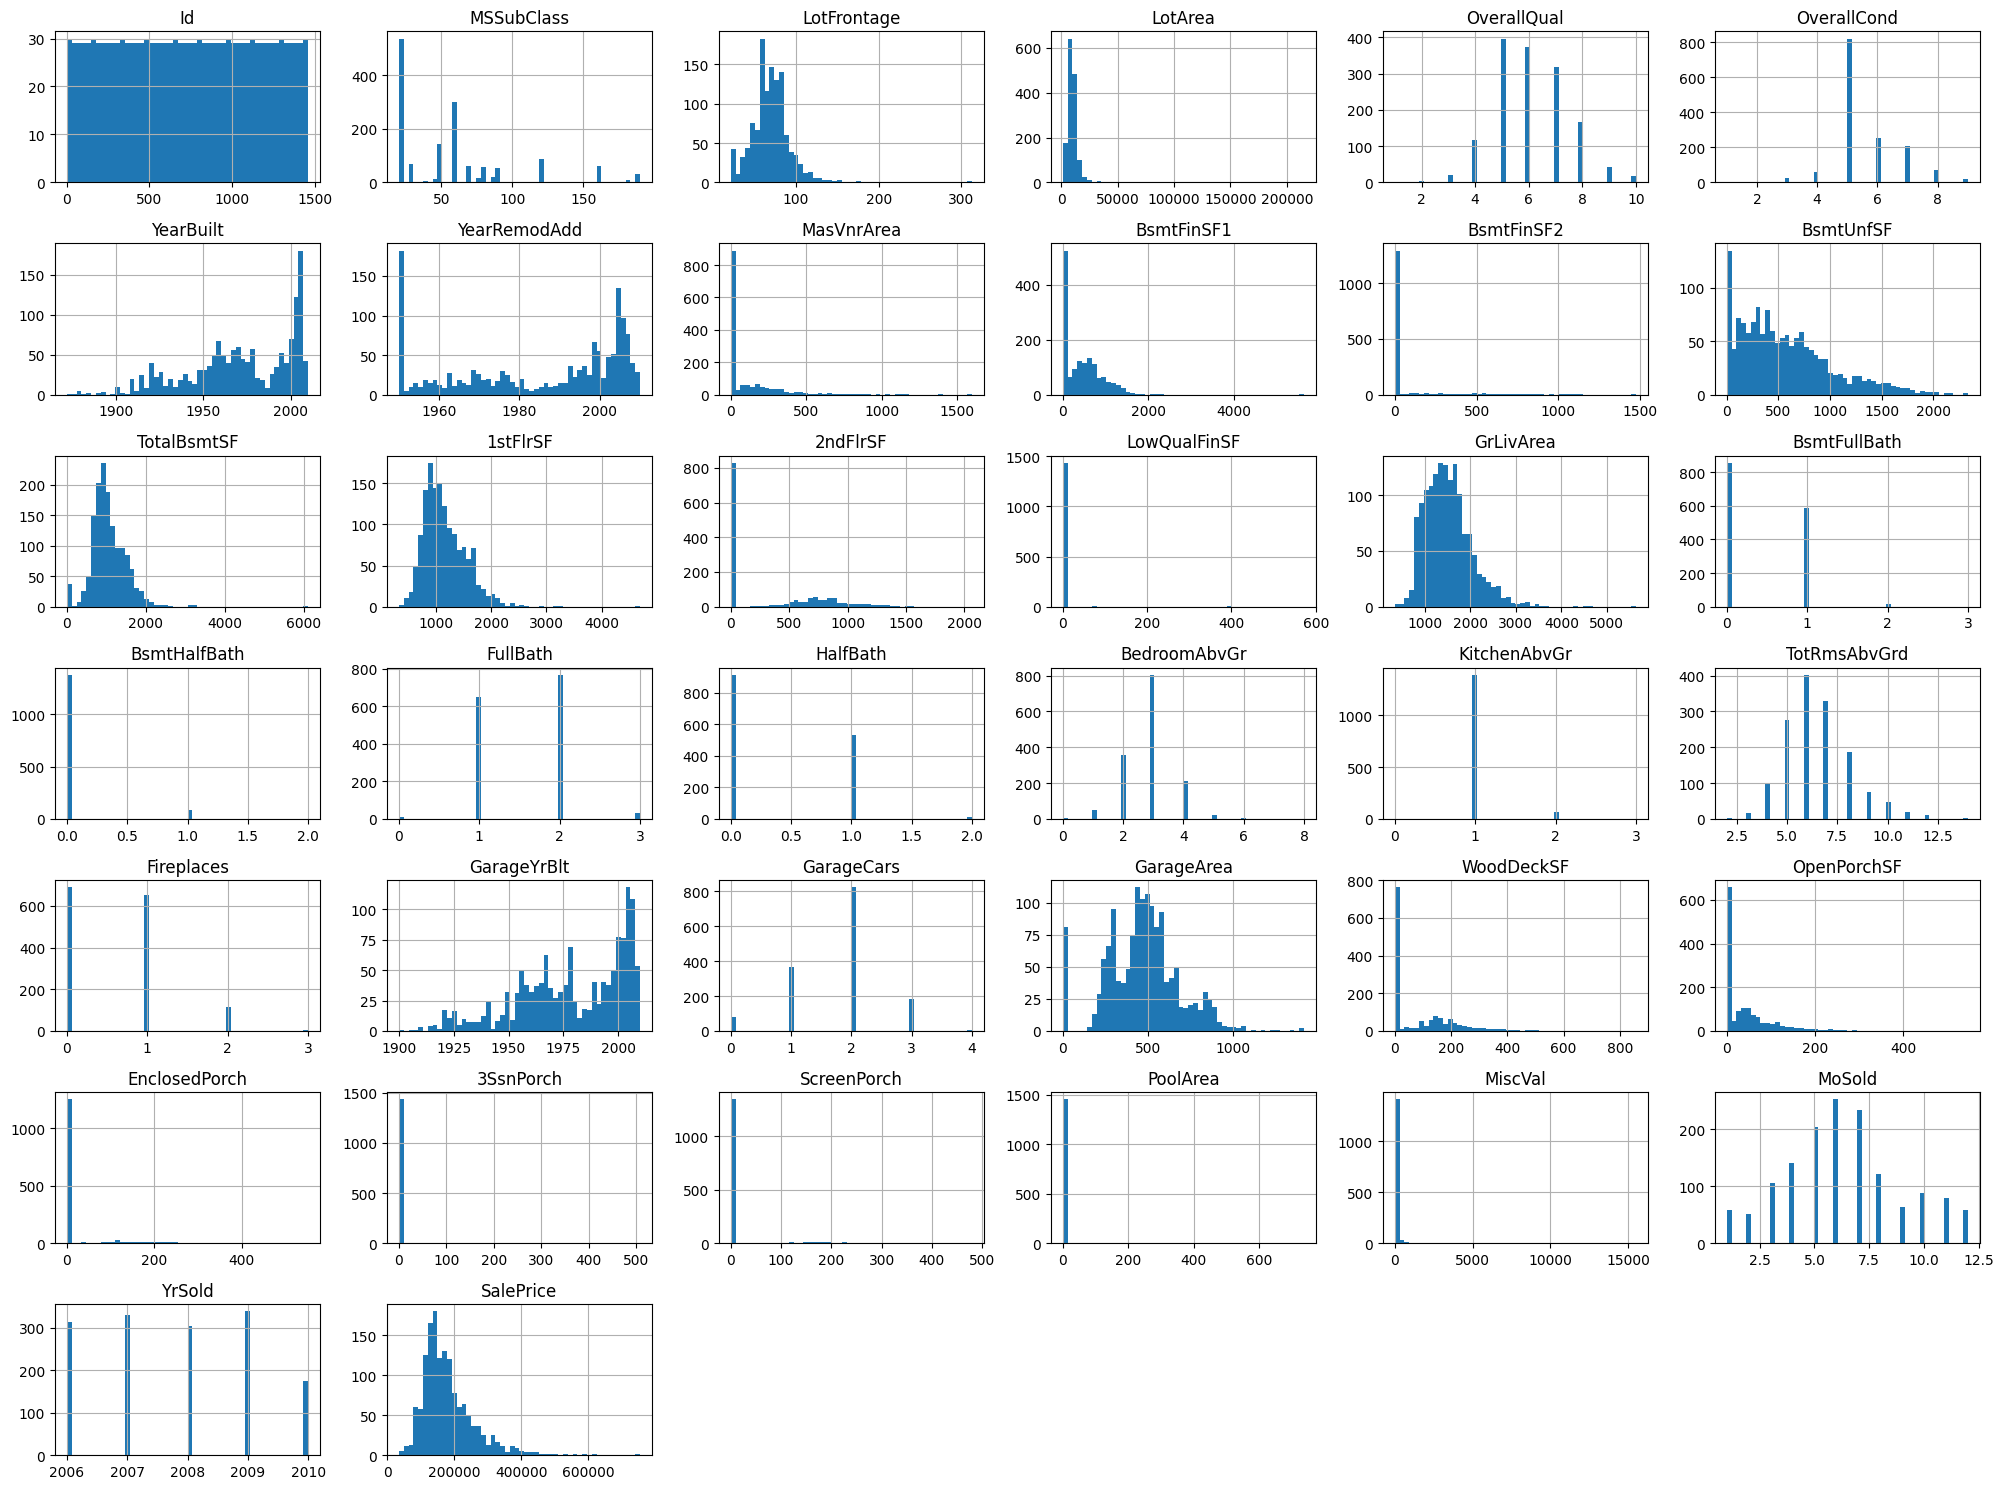

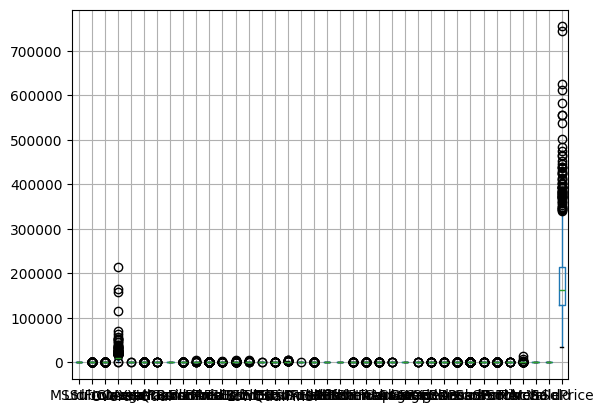

In [17]:
#Histogramas de cuantas veces se repite una variable (solo variables númericas)
import matplotlib.pyplot as plt
base.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show()

#Gráfica de caja - Se representa gráficamente una serie de datos numéricos a través de sus cuartiles.
base.boxplot()
plt.show()

*Los histogramas solo se gráficaron según cuantas veces se repite la variable. Basandonos en los anteriores histogramas podemos notar que algunos toman formas conocidas y conservan una distribución con la que se puede trabajar junto a la variable a predecir, entre ellos están LotFrontage, TotalBsmtSf, LotArea, 1stFlrSF, GrLivArea, GarageArea entre otros. Varias de esas variables conservan una distribución gamma en sus datos.*

#### **Correlaciones entre las variables (Todas las variables)**

In [20]:
#Función para calcular las correlaciones entre las variables
# Convert columns with numeric data to a numeric type
for col in base.select_dtypes(include=['object']).columns: # Select object columns(contains string objects)
    try: # Check to see if conversion to numeric is possible
        base[col] = pd.to_numeric(base[col]) # Convert to numeric if possible
    except ValueError: # Handle ValueError incase converstion is not possible
        print(f"Column '{col}' could not be converted to numeric. It may contain non-numeric values.")

# Calculate correlation matrix only for numeric columns
numeric_base = base.select_dtypes(include=np.number) # Selects only the numerical features
corr_matrix = numeric_base.corr() # Calculate correlation matrix
corr_matrix.style.background_gradient(cmap='coolwarm') # Apply color gradient

Column 'MSZoning' could not be converted to numeric. It may contain non-numeric values.
Column 'Street' could not be converted to numeric. It may contain non-numeric values.
Column 'LotShape' could not be converted to numeric. It may contain non-numeric values.
Column 'LandContour' could not be converted to numeric. It may contain non-numeric values.
Column 'Utilities' could not be converted to numeric. It may contain non-numeric values.
Column 'LotConfig' could not be converted to numeric. It may contain non-numeric values.
Column 'LandSlope' could not be converted to numeric. It may contain non-numeric values.
Column 'Neighborhood' could not be converted to numeric. It may contain non-numeric values.
Column 'Condition1' could not be converted to numeric. It may contain non-numeric values.
Column 'Condition2' could not be converted to numeric. It may contain non-numeric values.
Column 'BldgType' could not be converted to numeric. It may contain non-numeric values.
Column 'HouseStyle' 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.192411,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.051071,0.023573,0.192411,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.248546,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451

*En base a la tabla de correlación de variables se puede ver que entre mas azul oscura sea su casilla no existe correlación (cercana a 0), en cambio si la casilla es parecida a un color rojo la correlación se puede tomar como buena (por encima de 0.70).
También se puede notar la diagonal principal que esta repleta de unos ya que se esta comparando la variable con ella misma y por tal razón nos da este resultado.*

In [21]:
#Orden descendente de las correlaciones respecto a la variable a predecir
corr_matrix["SalePrice"].sort_values(ascending=False)

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


*Al ver las correlaciones respecto a la variable a predecir 'SalePrice' se puede decir que con la variable que mas se relaciona es 'OverallQual', de ahí sigue'GrLivArea' y así sucesivamente hasta llegar a la variable con la que menos comparte que es 'BsmtFinSF2'. A partir de esta información podemos determinar con cuales se variables se le puede comparar a la variable a predecir y tener un mejor modelo.*

#### **Mapa de calor (Todas las variables)**

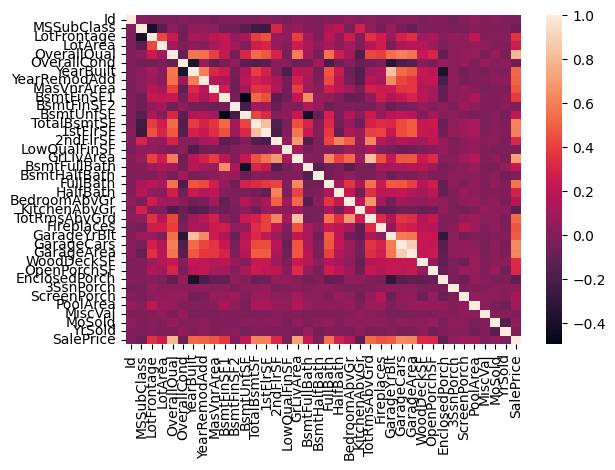

In [22]:
import seaborn as sns #librería útil para graficar mapas de calor, matrices
sns.heatmap(corr_matrix,xticklabels=corr_matrix.columns.values,yticklabels=corr_matrix.columns.values)
plt.tight_layout()
plt.show()

*En este mapa se puede apreciar mucho mejor las correlaciones que tienen las variables ya que se clasifica por colores, entre mas oscuro sea el color no hay una buena correlación pero si la casilla tiene un color claro se puede deducir que se la puede tener en cuenta. A pesar de haber muchos colores oscuros se puede apreciar que se destaca algunas casillas con colores claros.*

#### **Correlaciones entre las variables (Variables destacadas)**

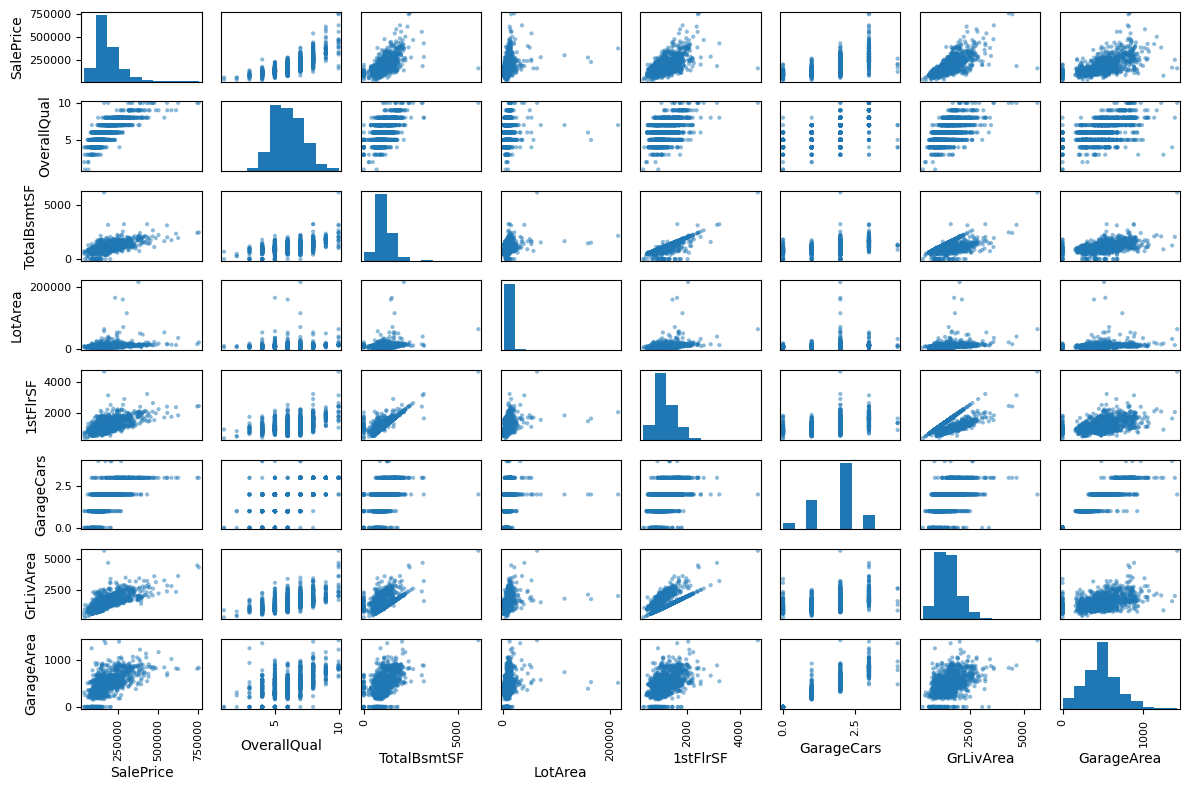

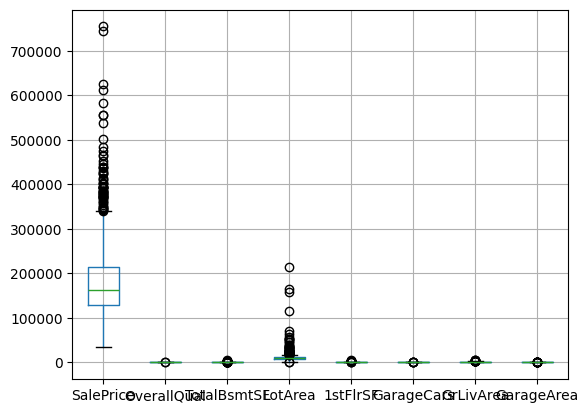

In [23]:
#Histogramas de cuantas veces se repite una variable (solo con variables de interés)
from pandas.plotting import scatter_matrix

attributes = ["SalePrice", "OverallQual", "TotalBsmtSF", "LotArea", "1stFlrSF",
              "GarageCars", "GrLivArea", "GarageArea"]
scatter_matrix(base[attributes], figsize=(12, 8))
plt.tight_layout()
plt.show()

#Gráfica de caja con variables de interés - Se representa gráficamente una serie de datos numéricos a través de sus cuartiles.
base[attributes].boxplot()
plt.show()

In [24]:
#Función para calcular las correlaciones entre las variables
corr_matrixx = base[attributes].corr()
corr_matrixx.style.background_gradient(cmap='coolwarm')

,SalePrice,OverallQual,TotalBsmtSF,LotArea,1stFlrSF,GarageCars,GrLivArea,GarageArea
SalePrice,1.000000,0.790982,0.613581,0.263843,0.605852,0.640409,0.708624,0.623431
OverallQual,0.790982,1.000000,0.537808,0.105806,0.476224,0.600671,0.593007,0.562022
TotalBsmtSF,0.613581,0.537808,1.000000,0.260833,0.819530,0.434585,0.454868,0.486665
LotArea,0.263843,0.105806,0.260833,1.000000,0.299475,0.154871,0.263116,0.180403
1stFlrSF,0.605852,0.476224,0.819530,0.299475,1.000000,0.439317,0.566024,0.489782
GarageCars,0.640409,0.600671,0.434585,0.154871,0.439317,1.000000,0.467247,0.882475
GrLivArea,0.708624,0.593007,0.454868,0.263116,0.566024,0.467247,1.000000,0.468997
GarageArea,0.623431,0.562022,0.486665,0.180403,0.489782,0.882475,0.468997,1.000000


*En base a la tabla de correlación de variables destacadas se puede ver que entre mas azul oscura sea su casilla no existe correlación (valor muy bajo), en cambio si la casilla es parecida a un color rojo la correlación se puede tomar como buena (por encima de 0.70).
También se puede notar la diagonal principal que esta repleta de unos ya que se esta comparando la variable con ella misma y por tal razón nos da este resultado.*

#### **Mapa de calor (Variables destacadas)**

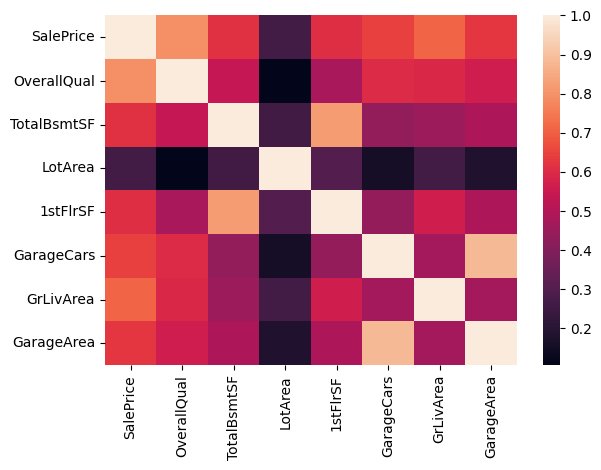

In [25]:
import seaborn as sns #librería útil para graficar mapas de calor, matrices
sns.heatmap(corr_matrixx,xticklabels=corr_matrixx.columns.values,yticklabels=corr_matrixx.columns.values)
plt.tight_layout()
plt.show()

*En este mapa se puede apreciar mucho mejor las correlaciones que tienen las variables destacadas ya que se clasifica por colores, entre mas oscuro sea el color no hay una buena correlación pero si la casilla tiene un color claro se puede deducir que se la puede tener en cuenta. A pesar de haber muchos colores oscuros se puede apreciar que se destaca algunas casillas con colores claros.*

In [26]:
#Estadística básica de todas las variables numéricas
base.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## **Proyecto en analítica de datos**

#### **Preprocesamiento de datos**

In [27]:
base_tratada = base
# Eliminar columnas
base_tratada = base_tratada.drop(["LotFrontage", "BsmtQual", "BsmtCond", "BsmtExposure",
                                  "BsmtFinType1", "BsmtFinType2", "GarageType", "GarageYrBlt",
                                  "GarageFinish", "GarageQual", "GarageCond"] , axis=1)
base_tratada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotArea        1460 non-null   int64 
 4   Street         1460 non-null   object
 5   LotShape       1460 non-null   object
 6   LandContour    1460 non-null   object
 7   Utilities      1460 non-null   object
 8   LotConfig      1460 non-null   object
 9   LandSlope      1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  Condition1     1460 non-null   object
 12  Condition2     1460 non-null   object
 13  BldgType       1460 non-null   object
 14  HouseStyle     1460 non-null   object
 15  OverallQual    1460 non-null   int64 
 16  OverallCond    1460 non-null   int64 
 17  YearBuilt      1460 non-null   int64 
 18  YearRemodAdd   1460 non-null

Se eliminaron los atributos que tienen datos faltantes, se los elimina a todos ya que no influyen en la variable de salida 'SalePrice'. Los atributos no presentan buena correlación con la variable de salida.

In [28]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

codificar = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
             'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
             'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
             'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']

for i in codificar:
  cat = base_tratada[[i]]
  cat_encoded = ordinal_encoder.fit_transform(cat)
  base_tratada[i] = cat_encoded

In [29]:
base_tratada.info()
base_tratada.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 65 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   float64
 5   LotShape       1460 non-null   float64
 6   LandContour    1460 non-null   float64
 7   Utilities      1460 non-null   float64
 8   LotConfig      1460 non-null   float64
 9   LandSlope      1460 non-null   float64
 10  Neighborhood   1460 non-null   float64
 11  Condition1     1460 non-null   float64
 12  Condition2     1460 non-null   float64
 13  BldgType       1460 non-null   float64
 14  HouseStyle     1460 non-null   float64
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3.0,8450,1.0,3.0,3.0,0.0,4.0,0.0,...,0,0,0,0,0,2,2008,8.0,4.0,208500
1,2,20,3.0,9600,1.0,3.0,3.0,0.0,2.0,0.0,...,0,0,0,0,0,5,2007,8.0,4.0,181500
2,3,60,3.0,11250,1.0,0.0,3.0,0.0,4.0,0.0,...,0,0,0,0,0,9,2008,8.0,4.0,223500
3,4,70,3.0,9550,1.0,0.0,3.0,0.0,0.0,0.0,...,272,0,0,0,0,2,2006,8.0,0.0,140000
4,5,60,3.0,14260,1.0,0.0,3.0,0.0,2.0,0.0,...,0,0,0,0,0,12,2008,8.0,4.0,250000
5,6,50,3.0,14115,1.0,0.0,3.0,0.0,4.0,0.0,...,0,320,0,0,700,10,2009,8.0,4.0,143000
6,7,20,3.0,10084,1.0,3.0,3.0,0.0,4.0,0.0,...,0,0,0,0,0,8,2007,8.0,4.0,307000
7,8,60,3.0,10382,1.0,0.0,3.0,0.0,0.0,0.0,...,228,0,0,0,350,11,2009,8.0,4.0,200000
8,9,50,4.0,6120,1.0,3.0,3.0,0.0,4.0,0.0,...,205,0,0,0,0,4,2008,8.0,0.0,129900
9,10,190,3.0,7420,1.0,3.0,3.0,0.0,0.0,0.0,...,0,0,0,0,0,1,2008,8.0,4.0,118000


Se uso el método "OrdinalEncoder" para cambiar todos los atributos o columnas que son tipo 'objeto' o 'texto' para 'númericos' o 'flotantes'. Así ya tenemos nuestra base de datos lista para aplicarle los métodos de regresión o clasificación según el caso.

#### **Preparación y Estandarización de datos**

In [30]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  #Constructor
bassse = base_tratada.copy()
scaler.fit(bassse)
train_set_nor = scaler.transform(bassse) #ndarray

<Axes: >

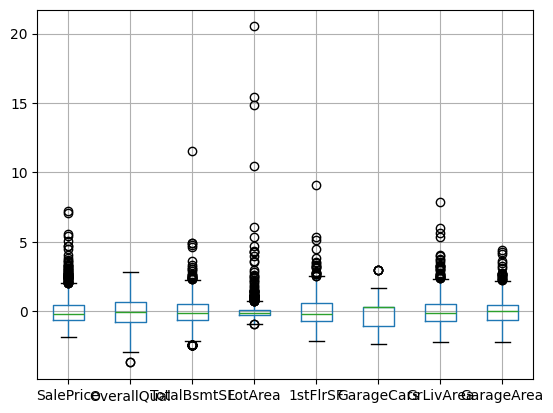

In [31]:
attributes = ["SalePrice", "OverallQual", "TotalBsmtSF", "LotArea", "1stFlrSF",
              "GarageCars", "GrLivArea", "GarageArea"]
train_set_nor_data = pd.DataFrame(train_set_nor, columns = base_tratada.columns)
train_set_nor_data.boxplot(attributes) #DataFrame

Se estandarizó la base de datos con "StandardScaler" para poder ver en una misma escala todas las variables deseadas que en este caso son las que mas correlación tienen con la variable de salida. Este paso solo se lo hace para apreciar a todo en una misma escala ya que para aplicar la predicción de la salida no tenemos que hacer este paso.

In [32]:
#Copiar la base de datos tratada para no modificarla por si se la necesita después
base_tratada_2 = base_tratada.copy()

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict #particionar

Salida = base_tratada_2["SalePrice"]

base_tratada_2.drop(columns = 'SalePrice', inplace=True)
X_train, X_test, y_train, y_test = train_test_split(base_tratada_2, Salida,
                                                    test_size=0.3) #30% para testing

#Se revisa el tamaño de los sets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1022, 64)
(1022,)
(438, 64)
(438,)


Particionamos la base de datos en 4 partes y queda de la siguiente manera:

- X_train = Entrenamiento con 1022 muestras y 64 atributos (variables) de entrada.

- y_train = Entrenamiento con 1022 muestras  y 1 atributo (variable) de salida.

- X_test = Testeo con 438 muestras y 64 atributos (variables) de entrada.

- y_test = Testeo con 438 muestras y 1 atributo (variable) de salida.

<Axes: >

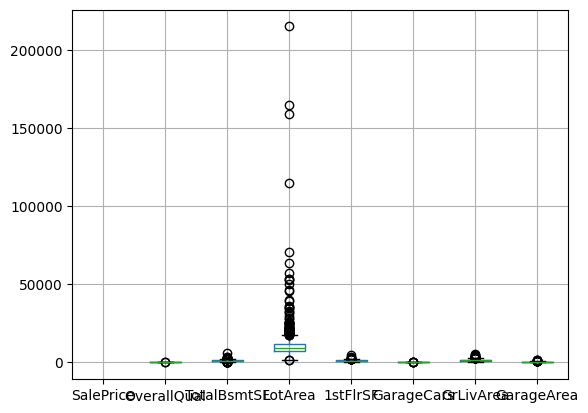

In [33]:
attributes = ["SalePrice", "OverallQual", "TotalBsmtSF", "LotArea", "1stFlrSF",
              "GarageCars", "GrLivArea", "GarageArea"]
train_set_nor_data = pd.DataFrame(base_tratada_2, columns = base_tratada.columns)
train_set_nor_data.boxplot(attributes) #DataFrame

Podemos confirmar que hemos hecho la partición con la base de datos sin escalar.

#### **Ramdon Forest (Regresor usado en Estado del Arte)**

In [34]:
#Copiamos las particiones en otras variables
X_train_forest = X_train.copy()
X_test_forest = X_test.copy()
y_train_forest = y_train.copy()
y_test_forest = y_test.copy()

In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

Bosque = Pipeline([
        #Estandarizamos los valores
        ('std_scaler', StandardScaler()), #MinMaxScaler ó StandardScaler
        #Colocamos el regresor que vamos a usar
        ('reg',RandomForestRegressor(n_estimators=100, random_state=0))
    ])

In [36]:
Bosque.fit(X_train_forest, y_train_forest)
Salida_bosque = Bosque.predict(X_test_forest) #Estimación de la salida sobre modelo entrenado
Salida_bosque #Miramos las estimaciones de salida

array([253605.8 , 130570.  , 142852.75, 382205.04, 171225.  ,  93156.34,
        98201.64, 112870.  , 201504.6 , 194377.24, 238022.79, 144340.12,
       251074.24, 143654.87, 138309.67, 122762.95, 182666.59, 169952.3 ,
       150572.28,  82528.5 , 116269.74, 138961.5 , 120128.16, 182988.3 ,
        61323.44, 205714.75, 163988.5 , 178031.8 , 250782.93, 140903.55,
       347168.14, 355558.07, 107391.34, 124105.71, 180795.63, 268972.46,
       190583.26, 123258.5 , 143867.12, 134359.16, 312745.18, 145693.  ,
       148513.62, 122544.71, 310985.4 , 103781.27, 311965.14, 130820.61,
       172788.9 , 130296.62, 146139.91, 145078.6 , 172589.99, 213382.69,
       117414.6 , 147027.  , 296755.  , 192976.72, 164000.37, 262029.  ,
        90739.66, 251337.54, 114800.47, 220701.4 , 222130.05, 325810.79,
       177011.84, 329775.75, 121345.83, 242679.22, 181927.17, 335573.2 ,
       161423.86, 157061.  , 100198.85, 179552.72, 221385.79, 159979.32,
       234661.5 , 193933.17, 176514.9 , 159842.39, 

In [37]:
#Se cálcula el ajuste entre las predicciones y los datos usando el mse
from sklearn.metrics import mean_squared_error

print("Error Cuadrático Medio")
lin_mse = mean_squared_error(y_test_forest, Salida_bosque)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

Error Cuadrático Medio


36787.169453201874

In [38]:
#Se cálcula el ajuste entre las predicciones y los datos usando el mae
from sklearn.metrics import mean_absolute_error

print("Error Absoluto Medio")
lin_mae = mean_absolute_error(y_test_forest, Salida_bosque)
lin_mae

Error Absoluto Medio


18535.044269406393

Podemos ver que los errores son muy bajos, en el error cuadrático medio nos arrojo un resultado alrededor de 30000 que quiere decir que la diferencia entre los valores del precio original y de la predicción de las casas es de 30000 dolares, esto mismo se aplica al error absoluto medio que nos dio alrededor 18000. Estos valores al estar hablando de sumas que rondan 100000 o 200000 dolares es muy considerable.

#### **Regresión lineal Bayesiana (Otro método)**

In [42]:
#Copiamos las particiones en otras variables
X_train_regl = X_train.copy()
X_test_regl = X_test.copy()
y_train_regl = y_train.copy()
y_test_regl = y_test.copy()

In [43]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import BayesianRidge
from sklearn.impute import SimpleImputer

Bayesiano = Pipeline([
    #Impute missing values using the mean
    ('imputer', SimpleImputer(strategy='mean')),
    #Estandarizamos los valores
    ('std_scaler', StandardScaler()), #MinMaxScaler ó StandardScaler
    #Colocamos el regresor que vamos a usar
    ('reg',BayesianRidge())
])

In [44]:
Bayesiano.fit(X_train_regl, y_train_regl)
Salida_Bayesiano = Bayesiano.predict(X_test_regl) #Estimación de la salida sobre modelo entrenado
Salida_Bayesiano

array([261780.84071113, 131673.00919348, 131522.40731424, 370097.77397563,
       164329.40600092, 108795.11160842,  97536.50086286, 103536.83841119,
       208995.94672682, 197675.12664991, 243508.49694321, 140764.30801518,
       210181.94898962, 153022.12702072, 142849.50222116, 132636.62211433,
       217229.33856508, 157319.96136756, 162387.62891936,  60836.88088966,
       128553.02318968, 118628.84576578, 110954.50094385, 195343.41076211,
        37693.11395579, 244390.0987432 , 173764.55861289, 189605.19410654,
       243068.81373236, 140493.18156984, 346426.37976498, 314160.16188959,
       108541.82306121, 129571.8178928 , 176584.13338571, 354560.68275299,
       196286.12113278, 113892.69835089, 131618.77103201, 144249.32556449,
       286473.34298836, 132715.08075441, 163530.37135037, 109468.71883177,
       274561.35999193,  88731.71391856, 302486.80868297, 108054.74577201,
       164340.0419259 , 143984.02255972, 141926.27281082, 168664.19018427,
       197254.44892946, 2

In [45]:
#Se cálcula el ajuste entre las predicciones y los datos usando el mse
from sklearn.metrics import mean_squared_error

print("Error Cuadrático Medio")
lin_mse = mean_squared_error(y_test_regl, Salida_Bayesiano)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

Error Cuadrático Medio


47929.60411992125

In [46]:
#Se cálcula el ajuste entre las predicciones y los datos usando el mae
from sklearn.metrics import mean_absolute_error

print("Error Absoluto Medio")
lin_mae = mean_absolute_error(y_test_regl, Salida_Bayesiano)
lin_mae

Error Absoluto Medio


20722.630626955175

Podemos ver que los errores son muy bajos, en el error cuadrático medio nos arrojo un resultado alrededor de 40000 que quiere decir que la diferencia entre los valores del precio original y de la predicción de las casas es de 40000 dolares, esto mismo se aplica al error absoluto medio que nos dio alrededor 21000. Estos valores al estar hablando de sumas que rondan 100000 o 200000 dolares es muy considerable.

#### **Aplicado para cualquier regresor**

In [50]:
#Copiamos las particiones en otras variables
X_train_todos = X_train.copy()
X_test_todos = X_test.copy()
y_train_todos = y_train.copy()
y_test_todos = y_test.copy()

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import StratifiedShuffleSplit

In [52]:
lista=[LinearRegression(),Lasso(),ElasticNet(),KernelRidge(kernel = 'rbf'),
      SGDRegressor(),BayesianRidge(),RandomForestRegressor(),SVR()]
indices=['LinearRegression','Lasso','ElasticNet','KernelRidge',
      'SGDRegressor','BayesianRidge','RandomForestRegressor','SVR']

i=0
mse = np.zeros((8))
mae = np.zeros((8))

for i in range(0,8):

  metodo = Pipeline([
        #Imputamos los valores faltantes con la media
        ('imputer', SimpleImputer(strategy='mean')), # strategy can be 'mean', 'median', 'most_frequent'
        #Estandarizamos los valores
        ('std_scaler', StandardScaler()), #MinMaxScaler ó StandardScaler
        #Colocamos el regresor que vamos a usar
        ('reg',lista[i])
    ])
  metodo.fit(X_train_todos, y_train_todos)
  Y_prediccion = metodo.predict(X_test_todos)

  #Calculo errores
  mse[i] = mean_squared_error(y_test_todos, Y_prediccion, squared=False)
  mae[i] = mean_absolute_error(y_test_todos, Y_prediccion)

  print(f'El error cuadrático medio para {indices[i]} es {round(mse[i],3)}')
  print(f'El error absoluto medio para {indices[i]} es {round(mae[i],3)}')
  print('-----------------------------------------------------------------')

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


El error cuadrático medio para LinearRegression es 48738.458
El error absoluto medio para LinearRegression es 21041.216
-----------------------------------------------------------------
El error cuadrático medio para Lasso es 48735.892
El error absoluto medio para Lasso es 21039.715
-----------------------------------------------------------------
El error cuadrático medio para ElasticNet es 43759.445
El error absoluto medio para ElasticNet es 19886.158
-----------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


El error cuadrático medio para KernelRidge es 56543.634
El error absoluto medio para KernelRidge es 27312.196
-----------------------------------------------------------------
El error cuadrático medio para SGDRegressor es 49345.491
El error absoluto medio para SGDRegressor es 21246.948
-----------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


El error cuadrático medio para BayesianRidge es 47929.604
El error absoluto medio para BayesianRidge es 20722.631
-----------------------------------------------------------------
El error cuadrático medio para RandomForestRegressor es 35956.629
El error absoluto medio para RandomForestRegressor es 18365.854
-----------------------------------------------------------------
El error cuadrático medio para SVR es 83412.778
El error absoluto medio para SVR es 55764.725
-----------------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [53]:
import pandas as pd
table=pd.DataFrame()
table["indices"]=indices
table["mse"]=mse
table["mae"]=mae
table
from IPython.display import HTML, display_html, display
display(HTML('<h2>Tabla de errores según su método</h2>'))
display_html(table)

,indices,mse,mae
0,LinearRegression,48738.458253,21041.215684
1,Lasso,48735.891582,21039.714659
2,ElasticNet,43759.445192,19886.158409
3,KernelRidge,56543.633637,27312.196253
4,SGDRegressor,49345.490783,21246.948250
5,BayesianRidge,47929.604120,20722.630627
6,RandomForestRegressor,35956.628802,18365.854178
7,SVR,83412.778454,55764.725085


Observamos a partir de la tabla que el peor regresor es el de Regresión Lineal ya que sus errores son muy elevados, este queda descartado para tomarlo siquiera como opción en una aplicación real.

El modelo y regresor que mejor se comporto es el Bosque Aleatorio o conocido normalmente como "RandomForest", este metodo obtuvo los errores mas bajos en los dos casos (mse y mae) y se concluye que la información proporcionada por el estado del arte es la más **sub-óptima**.

**Nota:** Es muy bueno antes de estudair una base de datos estudair en artículos como ha sido tratada o en últimas instancias como tratarón bases parecidas a la estudiada ya que esto nos da grandes ayudas para ahorrarnos tiempos desde que método usarón hasta los parámetros con los que se aplico.

#### **Mejor modelo (Random Forest)**

In [54]:
#Copiamos las particiones en otras variables
X_train_mejor = X_train.copy()
X_test_mejor = X_test.copy()
y_train_mejor = y_train.copy()
y_test_mejor = y_test.copy()

In [55]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

indices=[10, 100, 500, 1000, 5000]

mse=np.zeros((5))
mae=np.zeros((5))

for i in range(0,5):

  BAleatorio = Pipeline([
        ('std_scaler', StandardScaler()), #MinMaxScaler ó StandardScaler
        ('reg',RandomForestRegressor(n_estimators=indices[i]))
    ])

  BAleatorio.fit(X_train_mejor, y_train_mejor)
  Prediccion = BAleatorio.predict(X_test_mejor) #estimación de la salida sobre modelo entrenado

  lin_mse = mean_squared_error(y_test_mejor, Prediccion)
  mse[i] = np.sqrt(lin_mse)
  mae[i] = mean_absolute_error(y_test_mejor, Prediccion)

  print(f'El error cuadrático medio para {indices[i]} árboles es:', mse[i])
  print(f'El error absoluto medio para {indices[i]} árboles es:', mae[i])
  print("---------------------------------------------------------------------------------")

El error cuadrático medio para 10 árboles es: 36749.39478788646
El error absoluto medio para 10 árboles es: 20225.60136986301
---------------------------------------------------------------------------------
El error cuadrático medio para 100 árboles es: 35342.623358033205
El error absoluto medio para 100 árboles es: 18438.90614155251
---------------------------------------------------------------------------------
El error cuadrático medio para 500 árboles es: 35952.78521627516
El error absoluto medio para 500 árboles es: 18281.754561643836
---------------------------------------------------------------------------------
El error cuadrático medio para 1000 árboles es: 35981.47327073056
El error absoluto medio para 1000 árboles es: 18203.739851598173
---------------------------------------------------------------------------------
El error cuadrático medio para 5000 árboles es: 36020.85585391546
El error absoluto medio para 5000 árboles es: 18263.89831826484
---------------------------

In [56]:
import pandas as pd
table=pd.DataFrame()
table["# Trees"]=indices
table["mse"]=mse
table["mae"]=mae
table
from IPython.display import HTML, display_html, display
display(HTML('<h2>Número de árboles</h2>'))
display_html(table)

,# Trees,mse,mae
0,10,36749.394788,20225.601370
1,100,35342.623358,18438.906142
2,500,35952.785216,18281.754562
3,1000,35981.473271,18203.739852
4,5000,36020.855854,18263.898318
